In [80]:
# Importing Necessary Libraries and Functions

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from matplotlib.colors import ListedColormap

from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'

# **Reading The .csv File**

In [81]:
# Read csv File
print('\n')
df = pd.read_csv("cancer patient data sets.csv", index_col='index')

# Display Data
display(df)
print('\n')

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,P1996,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
1997,P1997,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
1998,P1998,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


# **Dropping and Cleaning Data**

In [82]:
# Index Column now refers to patient

print('\n')
df.drop("Patient Id", axis=1, inplace=True)

# Cleaning Column Names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

# Display Data After Cleaning
display(df)
print('\n')

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
1997,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
1998,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High


# **Check for Null Values**

In [83]:
# Check For Null Values

print('\n')
df.isnull().sum()

age                         0
gender                      0
air_pollution               0
alcohol_use                 0
dust_allergy                0
occupational_hazards        0
genetic_risk                0
chronic_lung_disease        0
balanced_diet               0
obesity                     0
smoking                     0
passive_smoker              0
chest_pain                  0
coughing_of_blood           0
fatigue                     0
weight_loss                 0
shortness_of_breath         0
wheezing                    0
swallowing_difficulty       0
clubbing_of_finger_nails    0
frequent_cold               0
dry_cough                   0
snoring                     0
level                       0
dtype: int64

# **Print Information**

In [84]:
# Print Information

print('\n')
print(df.info())
print('\n')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001 entries, 0 to 2000
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       2001 non-null   int64 
 1   gender                    2001 non-null   int64 
 2   air_pollution             2001 non-null   int64 
 3   alcohol_use               2001 non-null   int64 
 4   dust_allergy              2001 non-null   int64 
 5   occupational_hazards      2001 non-null   int64 
 6   genetic_risk              2001 non-null   int64 
 7   chronic_lung_disease      2001 non-null   int64 
 8   balanced_diet             2001 non-null   int64 
 9   obesity                   2001 non-null   int64 
 10  smoking                   2001 non-null   int64 
 11  passive_smoker            2001 non-null   int64 
 12  chest_pain                2001 non-null   int64 
 13  coughing_of_blood         2001 non-null   int64 
 14  fatigue               

# **Replace "level" with Integer**

In [85]:
# Replace "level" with Integer

print('\n')
print('Cancer Levels: ', df['level'].unique())

# Replacing levels with int
df["level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
print('Cancer Levels: ', df['level'].unique())

print('\nColumns in dataframe: \n', df.columns)
print('\n')



Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]

Columns in dataframe: 
 Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')




In [86]:
# Round

print('\n')
round(df.describe().iloc[1:, ].T, 1)

,mean,std,min,25%,50%,75%,max
age,37.2,12.0,14.0,28.0,36.0,45.0,73.0
gender,1.4,0.5,1.0,1.0,1.0,2.0,2.0
air_pollution,3.8,2.0,1.0,2.0,3.0,6.0,8.0
alcohol_use,4.6,2.6,1.0,2.0,5.0,7.0,8.0
dust_allergy,5.2,2.0,1.0,4.0,6.0,7.0,8.0
occupational_hazards,4.8,2.1,1.0,3.0,5.0,7.0,8.0
genetic_risk,4.6,2.1,1.0,2.0,5.0,7.0,7.0
chronic_lung_disease,4.4,1.8,1.0,3.0,4.0,6.0,7.0
balanced_diet,4.5,2.1,1.0,2.0,4.0,7.0,7.0
obesity,4.5,2.1,1.0,3.0,4.0,7.0,7.0


# **Print and Visualize Columns**

In [87]:
# Print and Visualize Columns

print('\n')
df.columns

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')

In [88]:
# Consolidating Necessary Columns

cols = [
    'age', 'weight_loss', 'smoking'
]

cols2 = [ 'gender']

cols3 = [
    'air_pollution', 'alcohol_use', 'dust_allergy', 'smoking', 'chest_pain', 'fatigue'
]



*************************************************************************************************************************


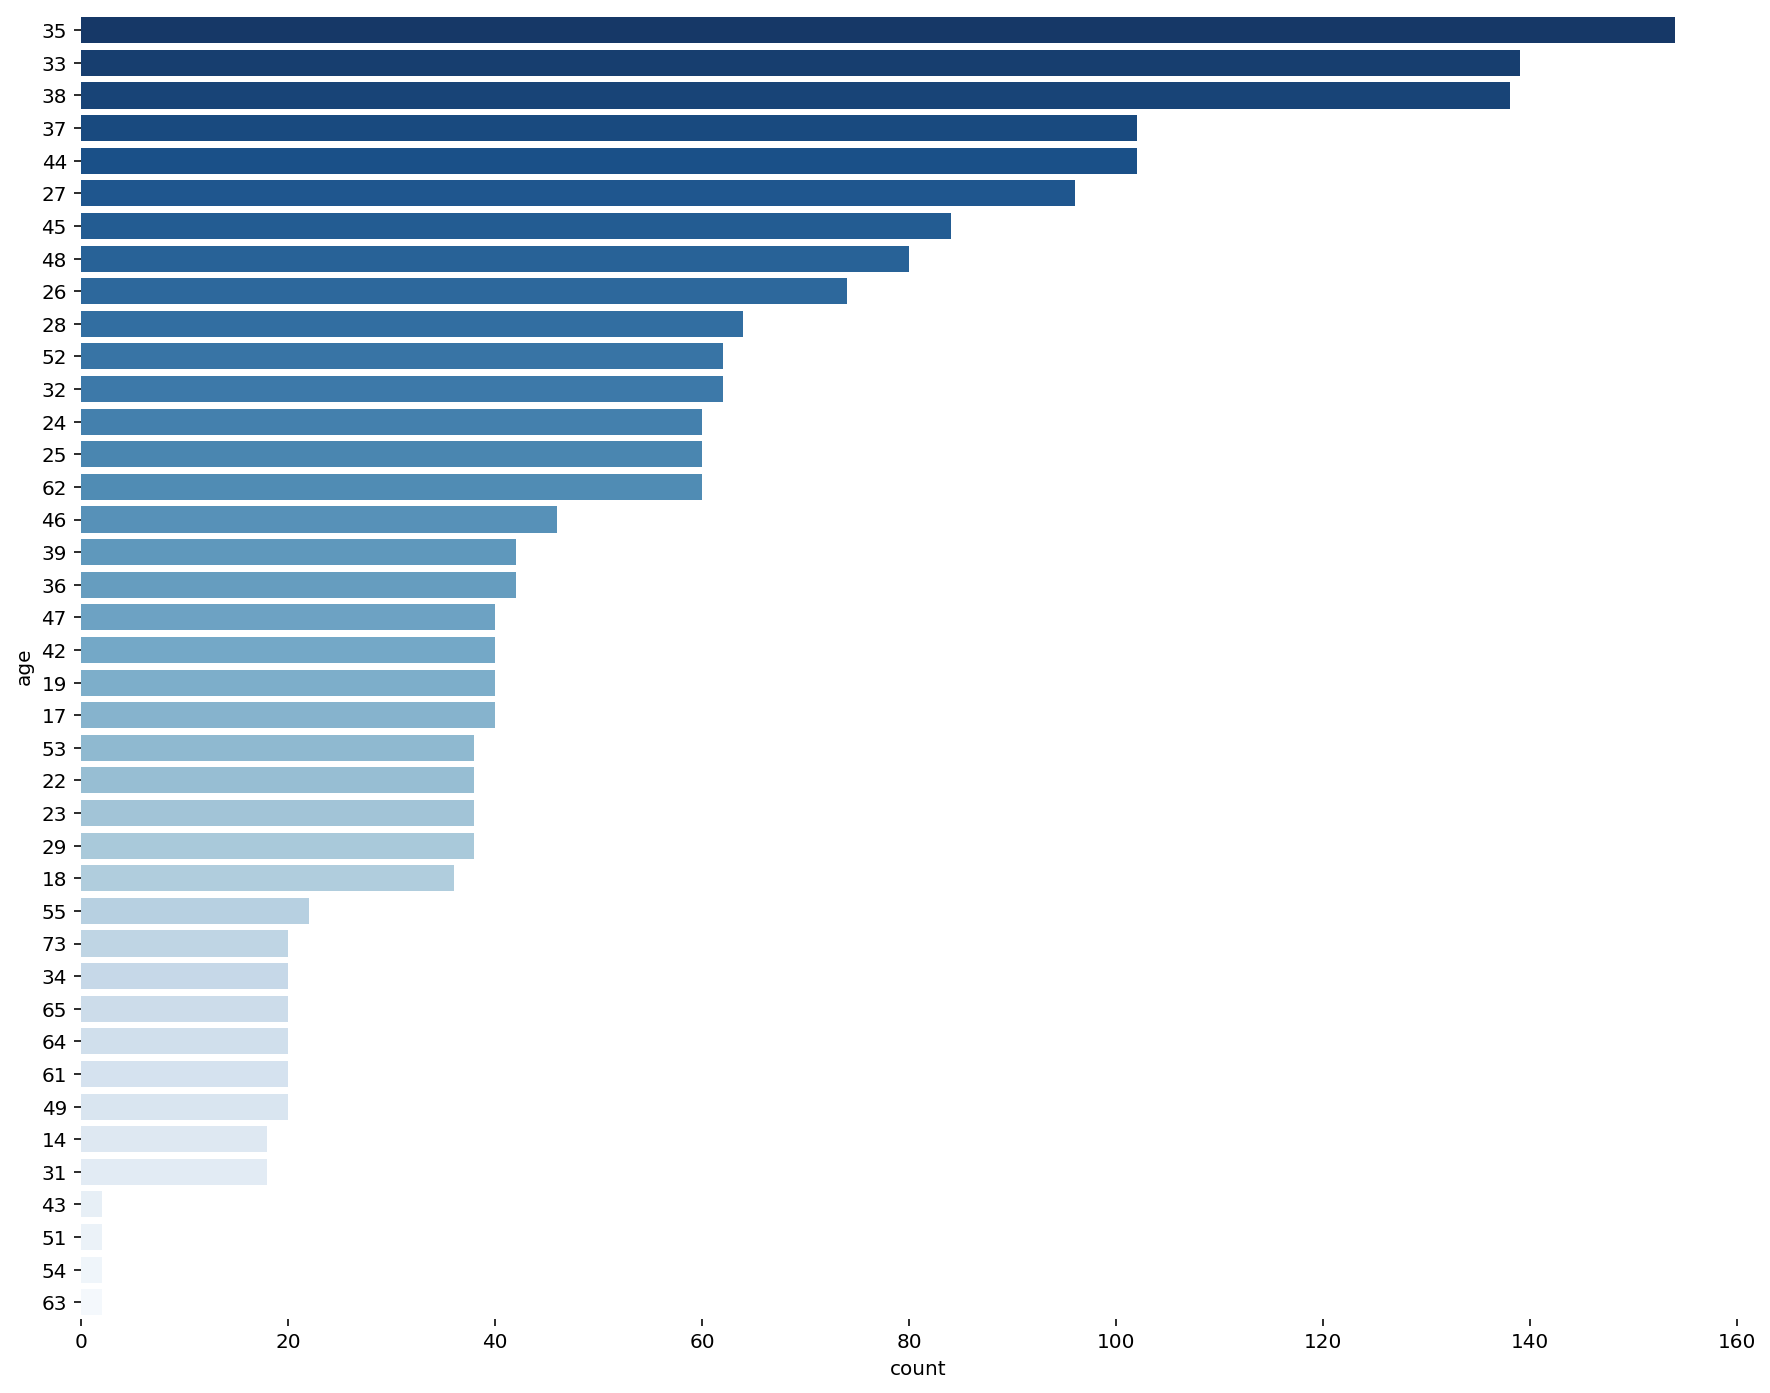

*************************************************************************************************************************


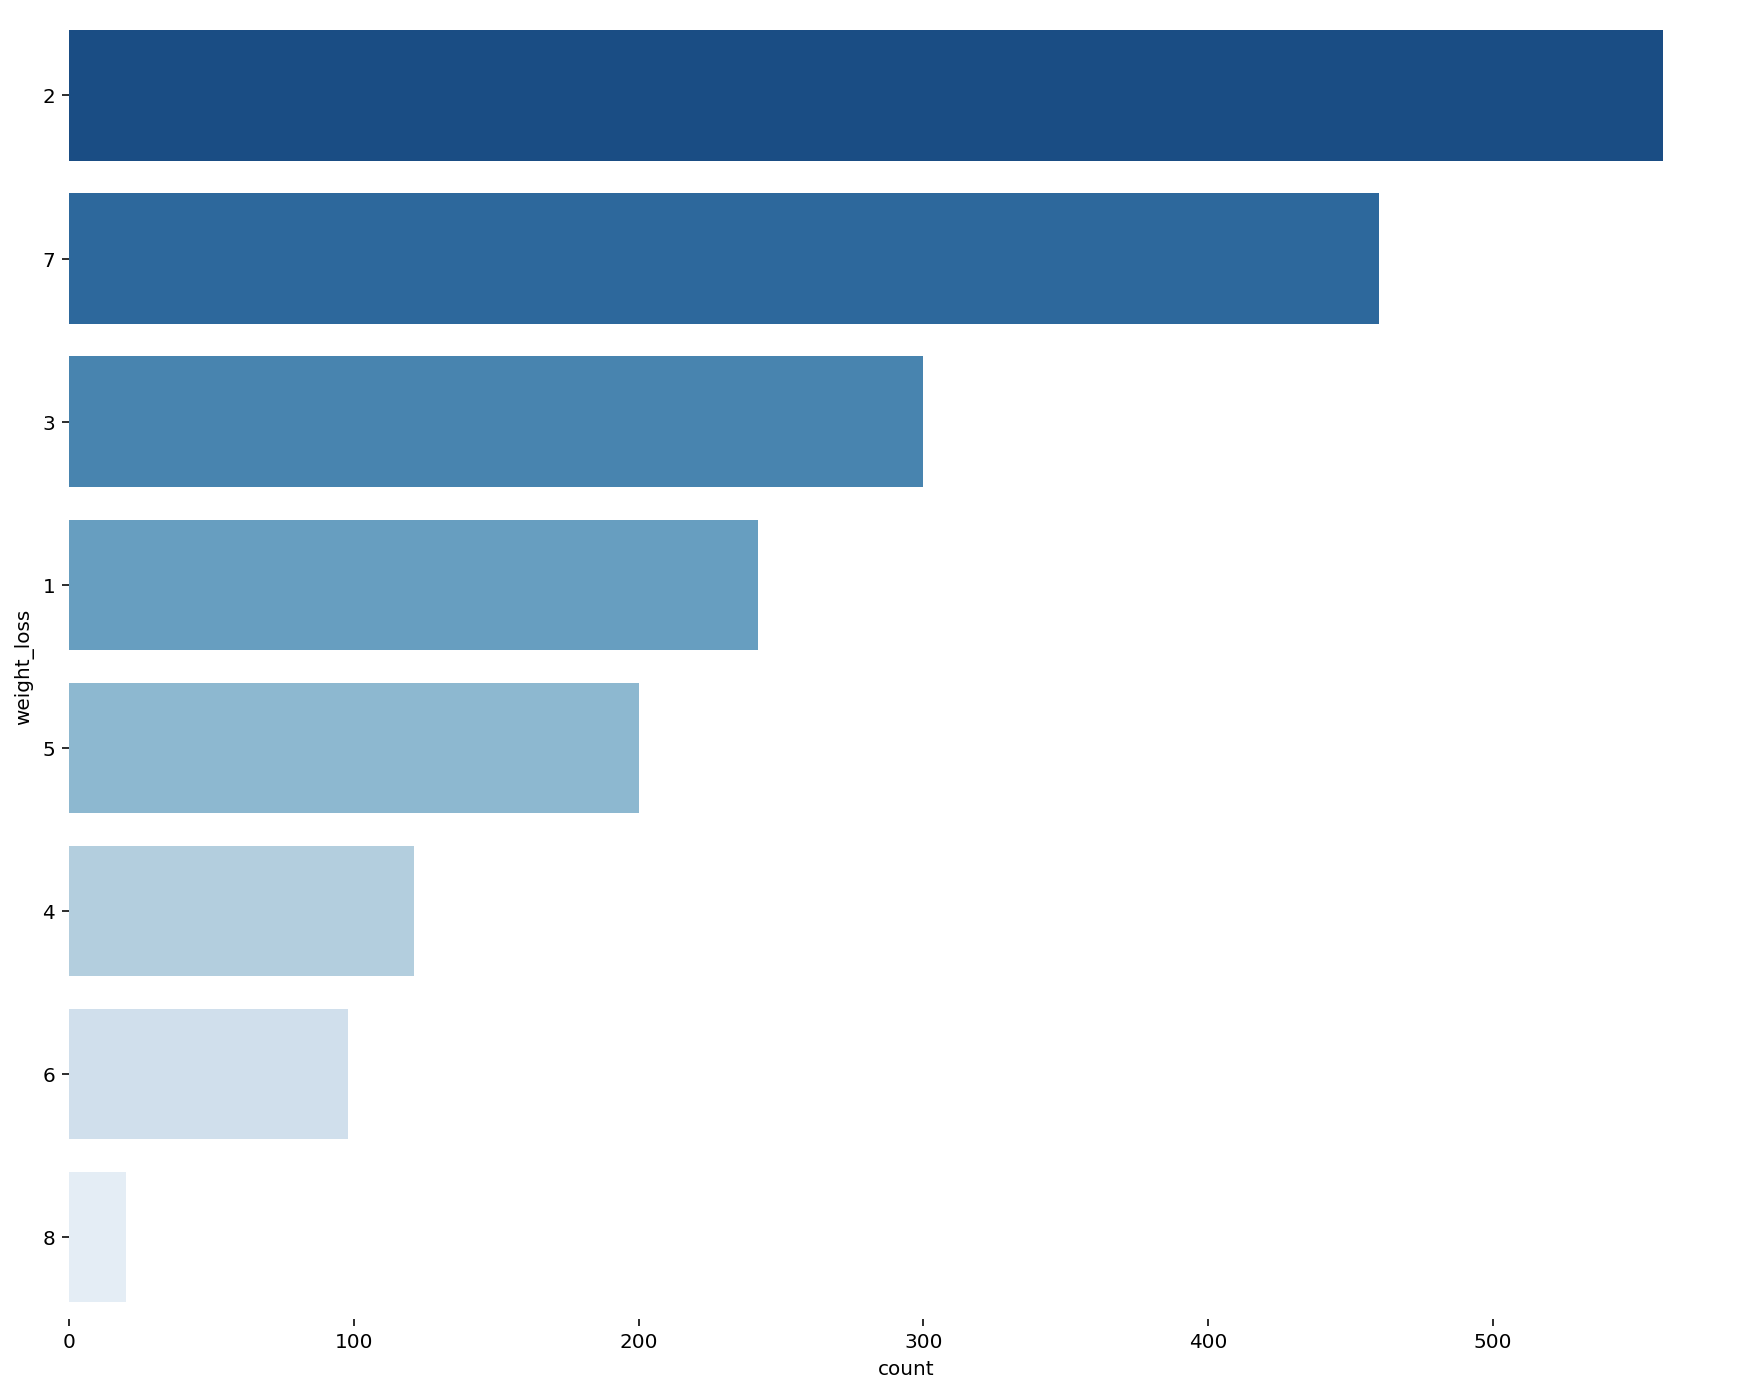

*************************************************************************************************************************


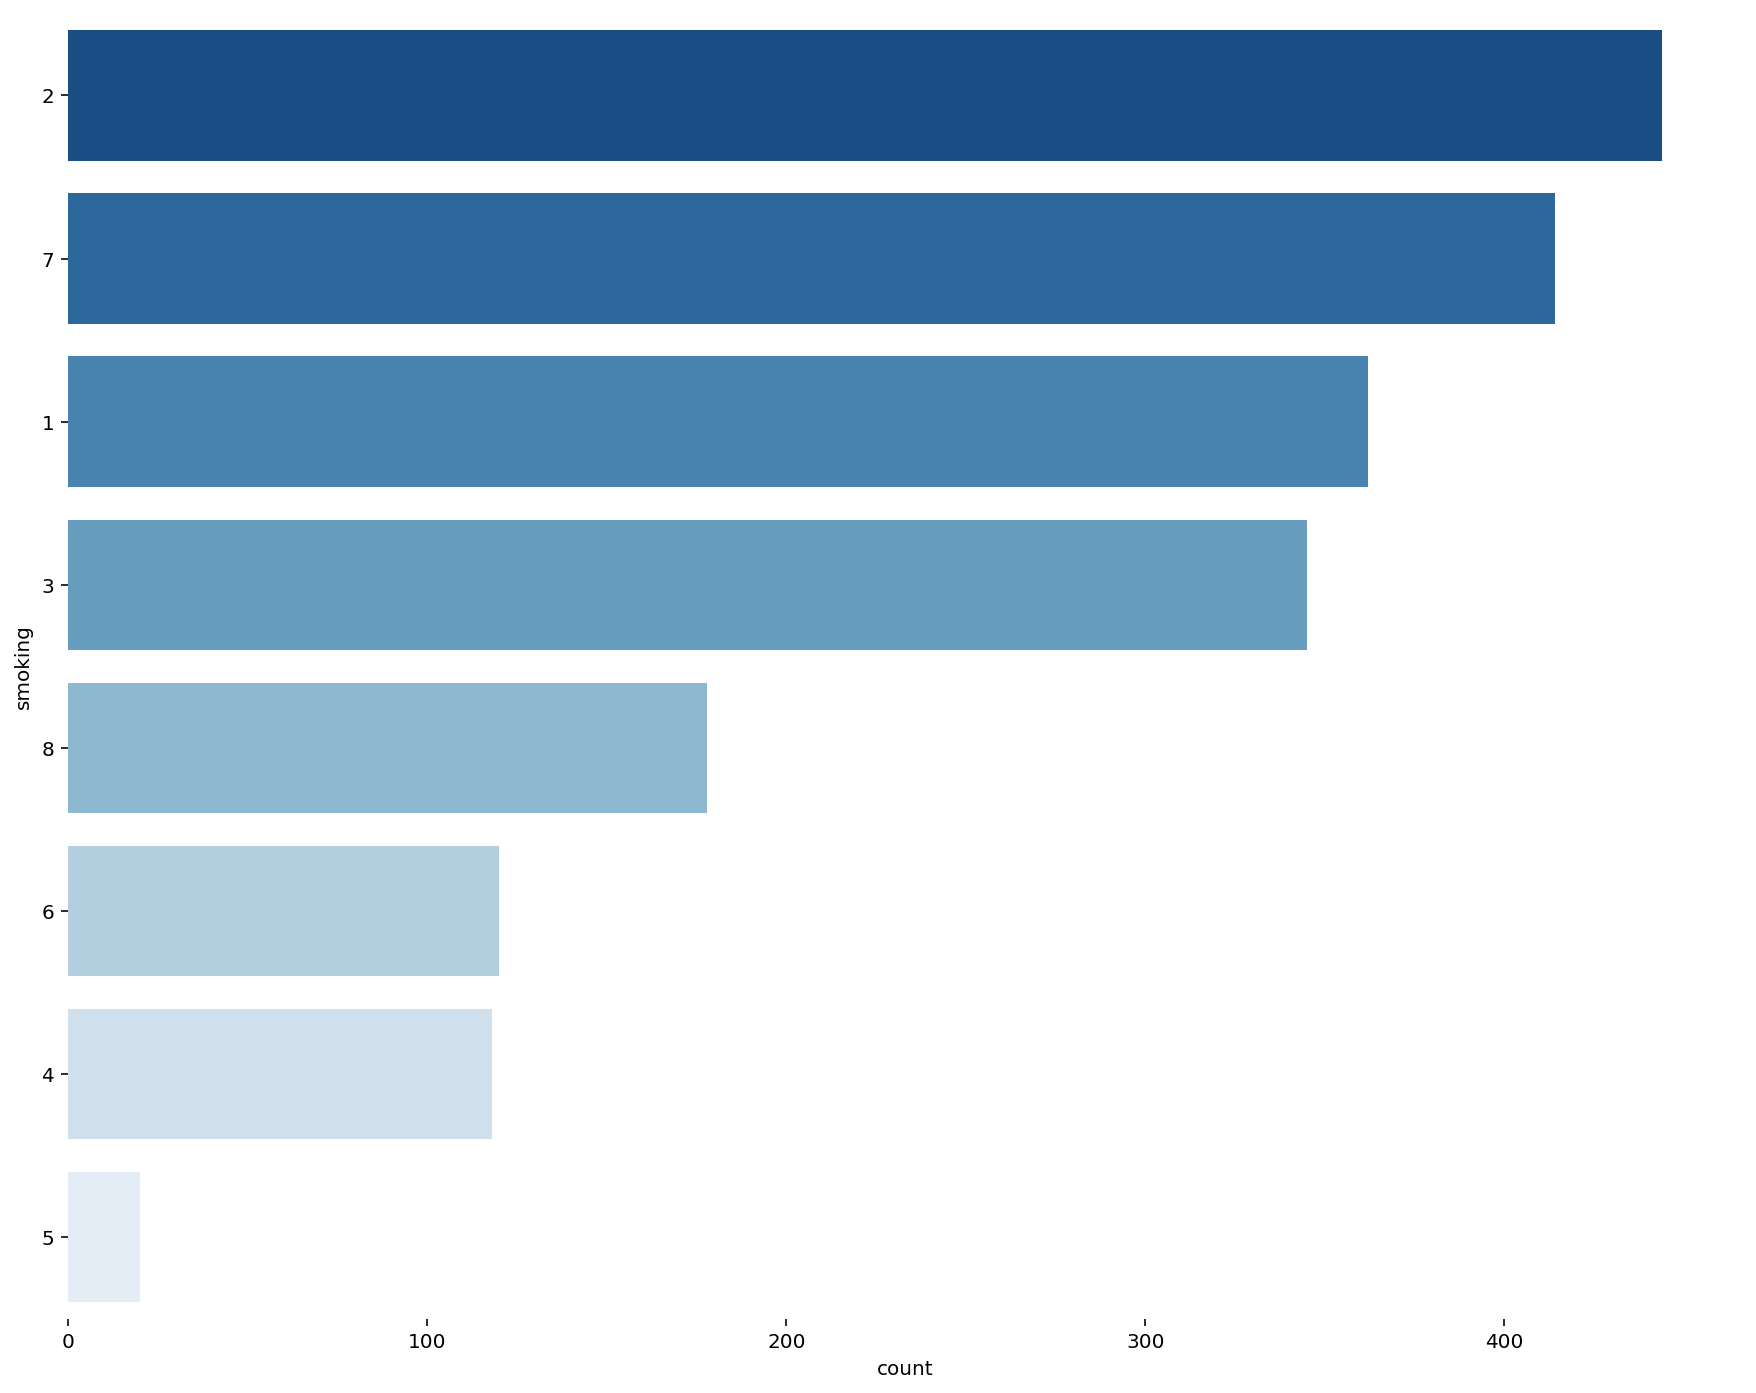

**********************************************************************************************************************


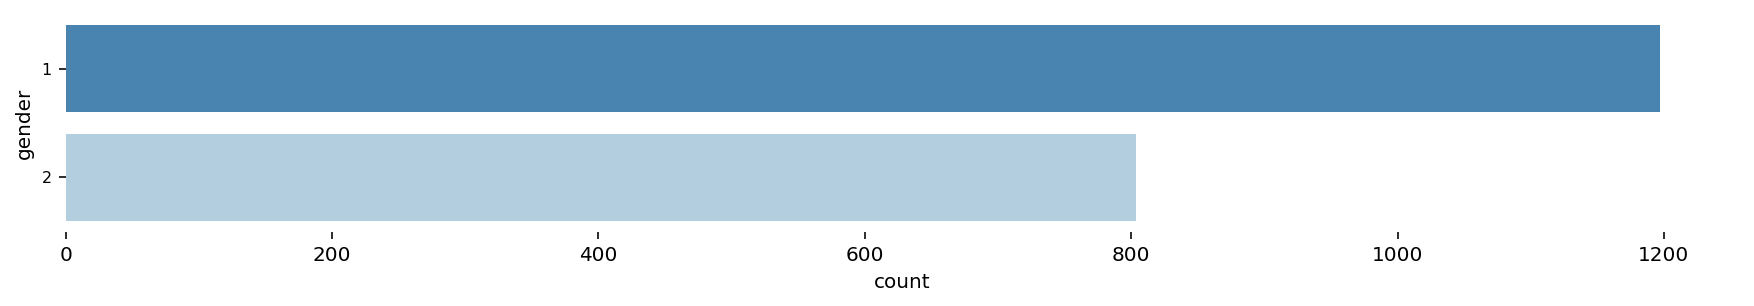

In [89]:
#Presenting the countplots for categorical features

print('\n')
for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(15, 12))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
  plt.ylabel(i)
  plt.yticks(fontsize=10)
  print("*************************************************************************************************************************")
  plt.box(False)
  plt.show()

# Gender
for i in cols2:
    fig, ax = plt.subplots(1,1, figsize=(15, 2))
    sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
    plt.ylabel(i)
    plt.yticks(fontsize=8)
    print("**********************************************************************************************************************")
    plt.box(False)
    plt.show()

print('\n')

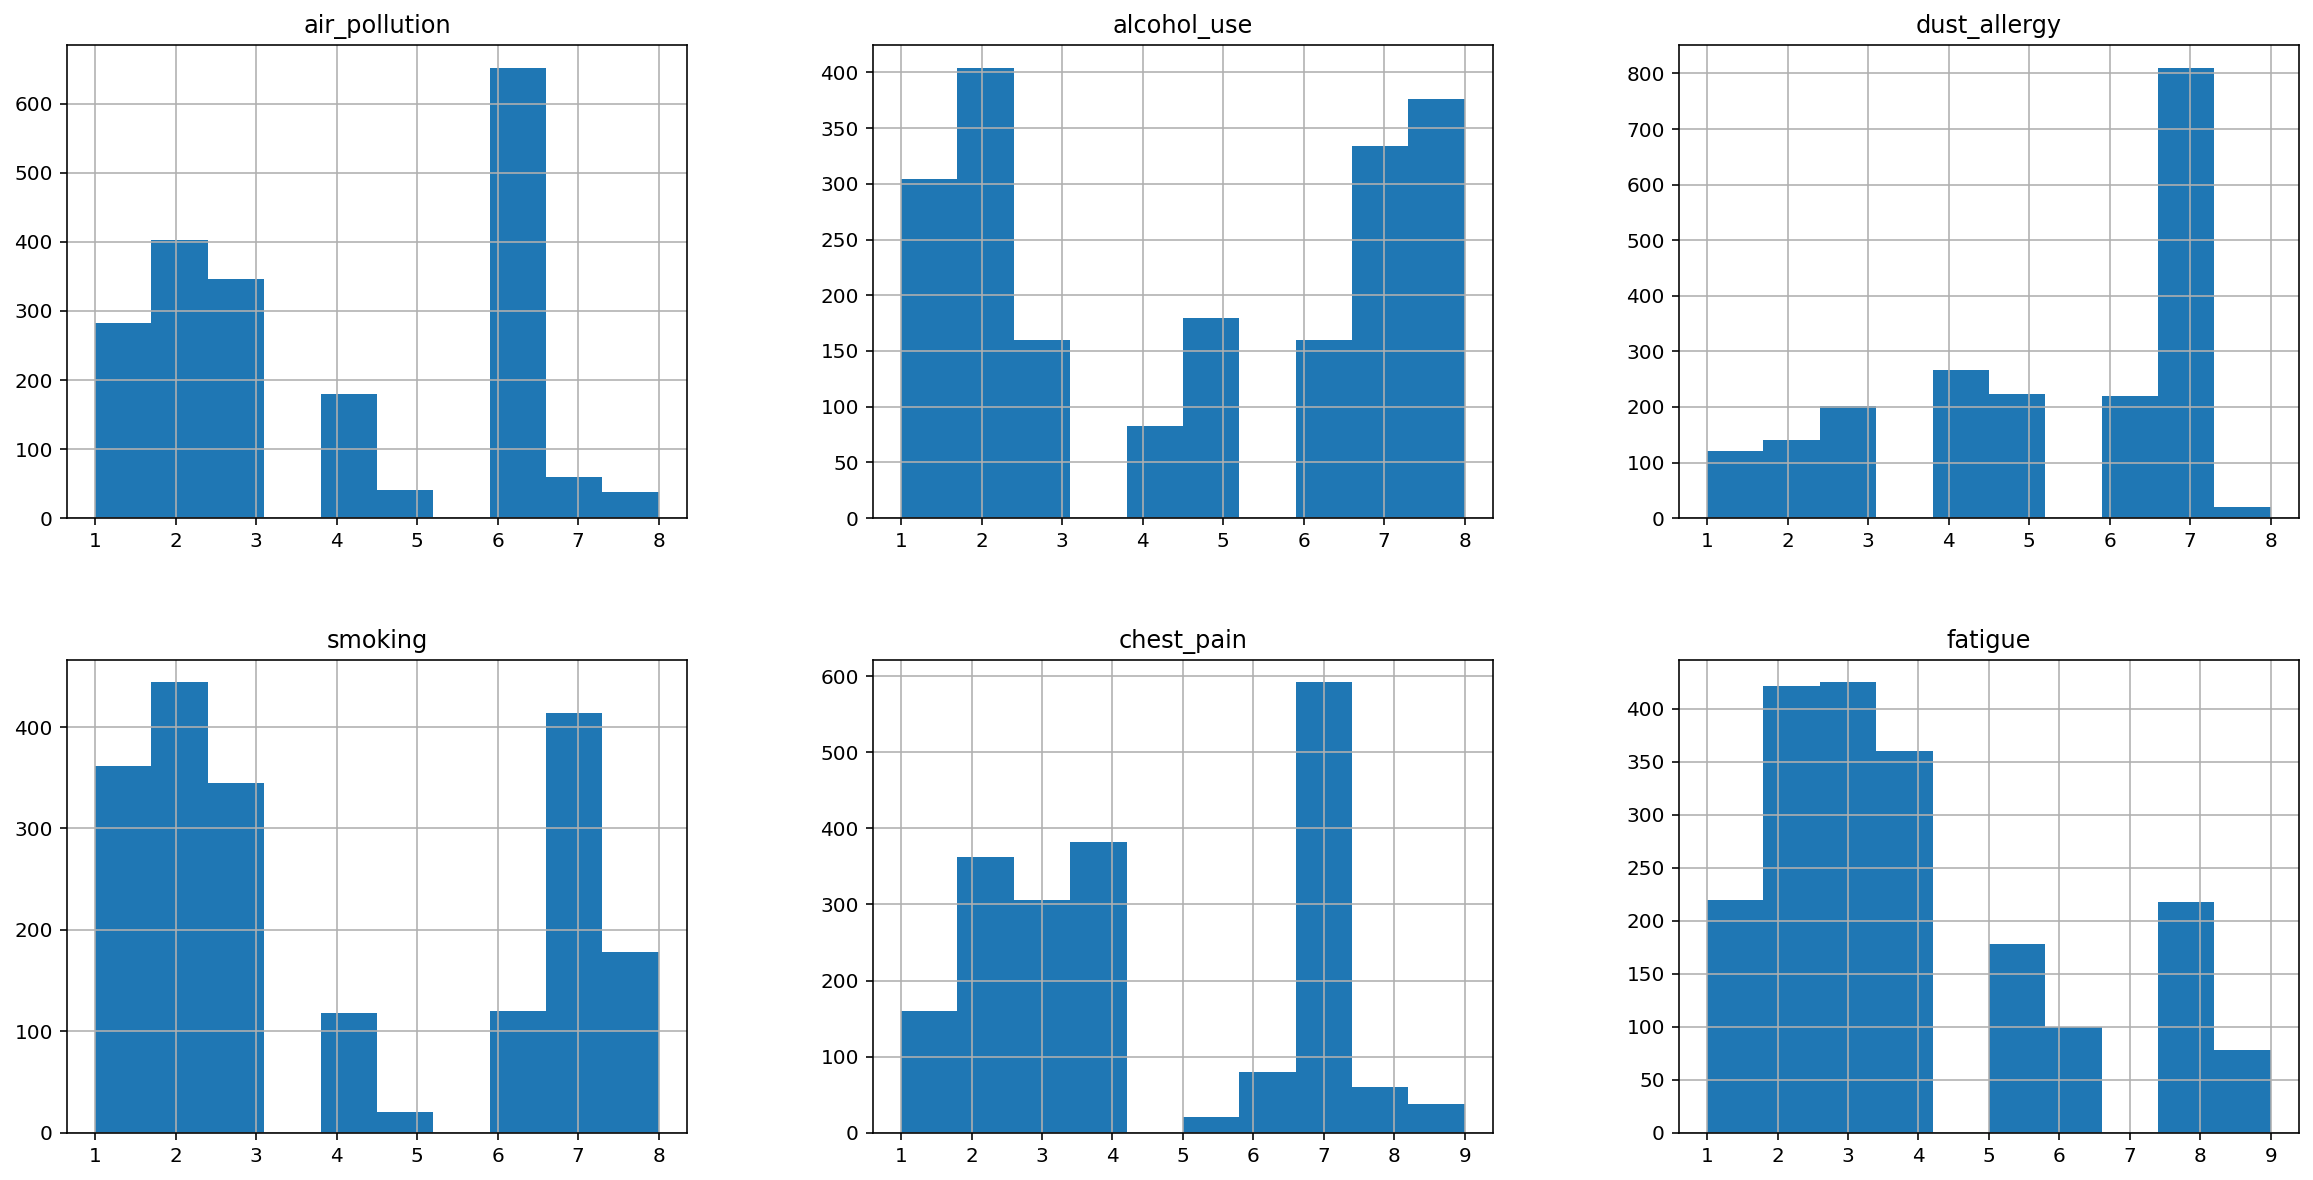

In [90]:
# Histograms

print('\n')
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
ax = ax.flatten()
i = 0

for c in cols3:
    df.hist(c, figsize=(4,4), ax=ax[i], label=f'{c}')
    i = i + 1;
plt.show()
print('\n')

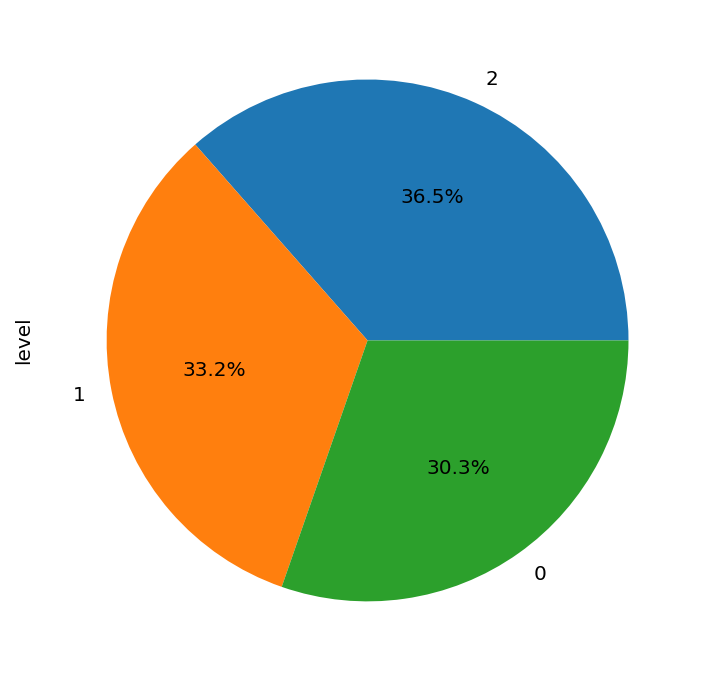

In [91]:
# Pie Chart

df['level'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.show()


	Smoking and Label of Lung Cancer


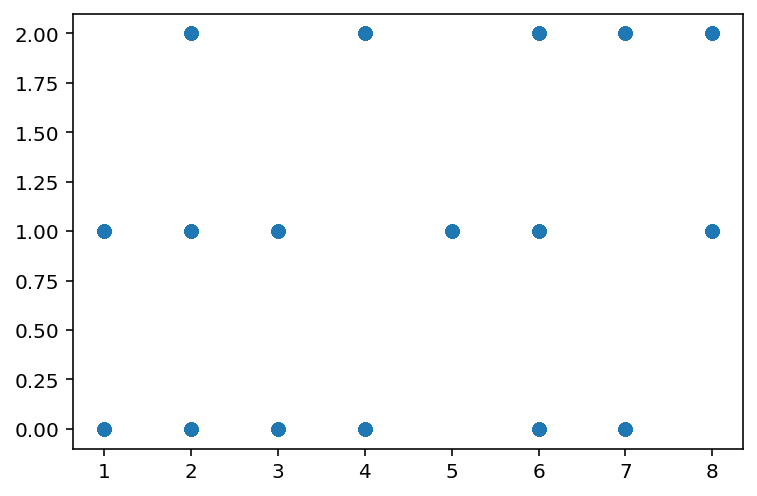




	Air Polution and Label of Lung Cancer


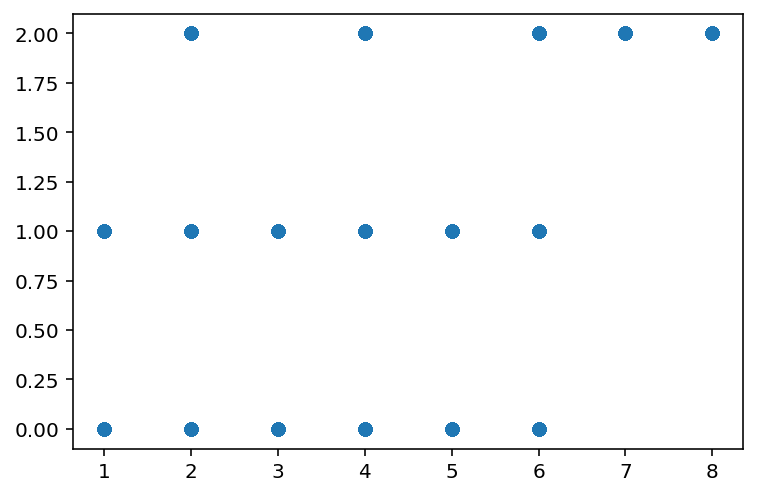

In [92]:
# Scatter Plot

print('\n\tSmoking and Label of Lung Cancer')
plt.scatter(df['smoking'], df['level'])
plt.show()
print('\n')

print('\n\tAir Polution and Label of Lung Cancer')
plt.scatter(df['air_pollution'], df['level'])
plt.show()
print('\n')

# **Heatmap**

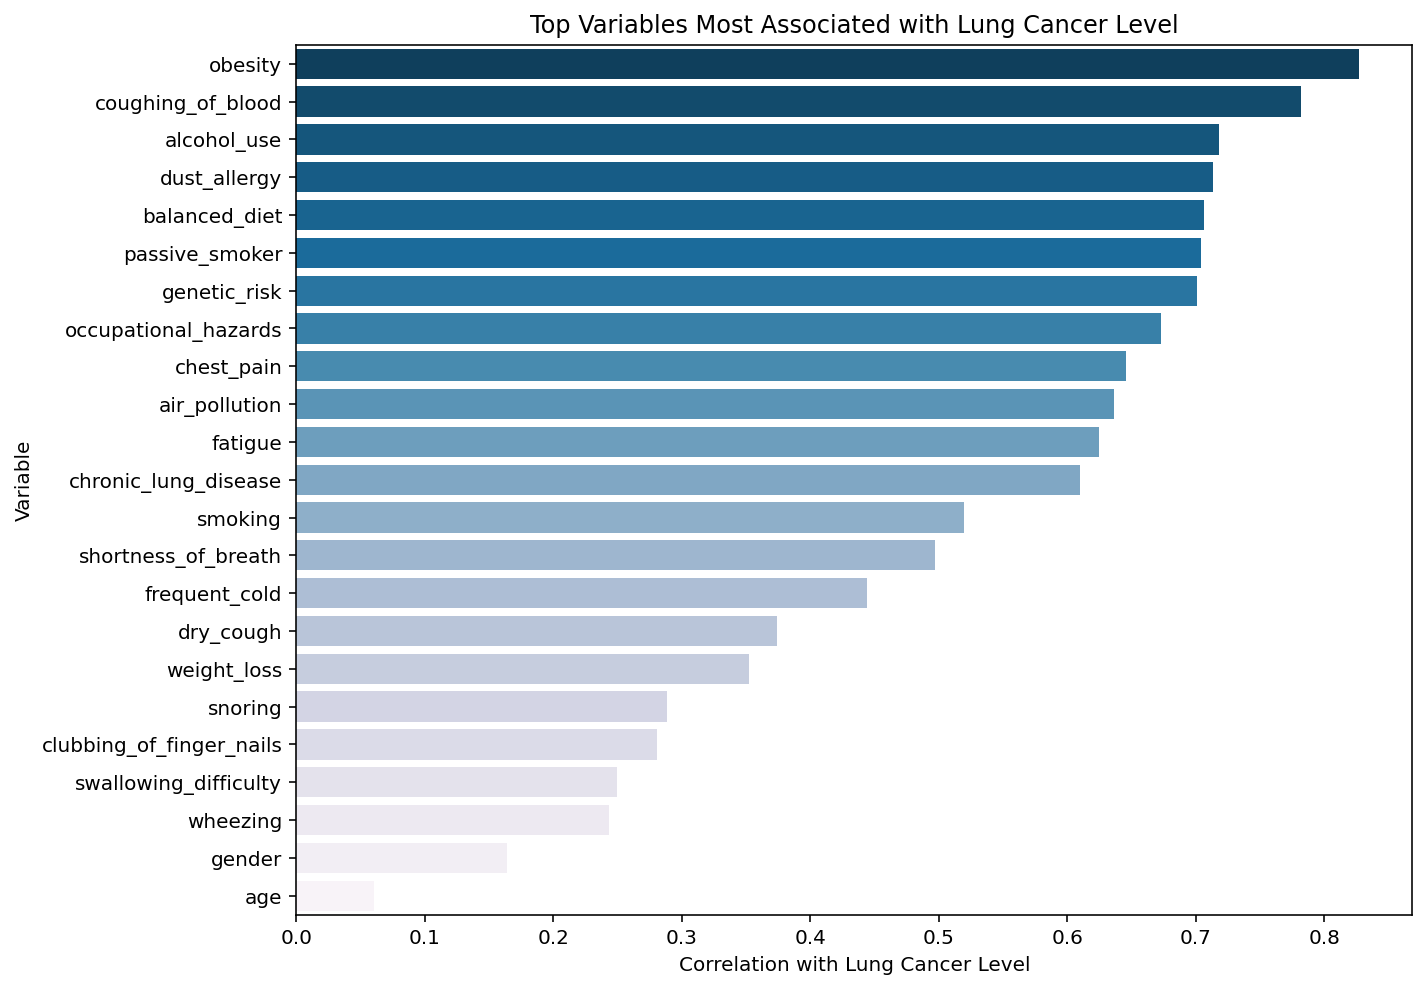

In [93]:
# Calculate the correlation values between each variable and the level variable
correlations = df.corr()['level'].drop('level')
correlations = correlations.abs().sort_values(ascending=False)

# Plot a horizontal bar chart of the top variables with their respective correlation values
plt.figure(figsize=(10,8))
ax = sns.barplot(x=correlations.values, y=correlations.index, palette='PuBu_r')
ax.set_title('Top Variables Most Associated with Lung Cancer Level')
ax.set_xlabel('Correlation with Lung Cancer Level')
ax.set_ylabel('Variable')
plt.show()


# **Visualization of gender**

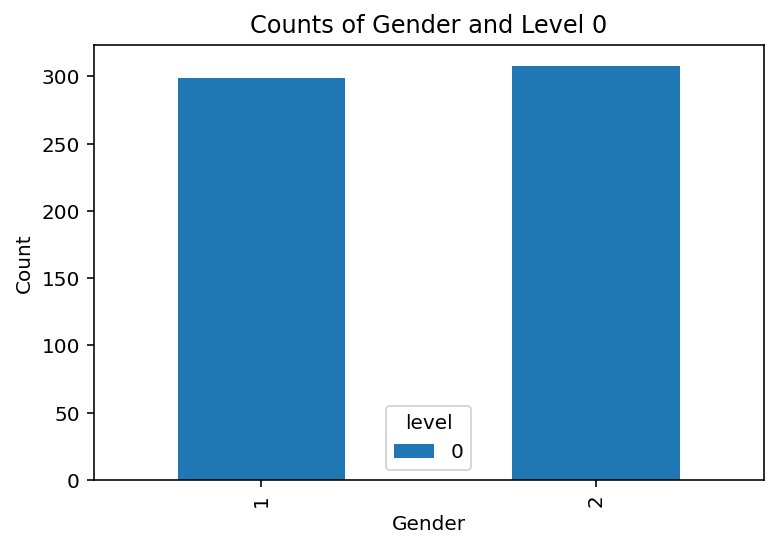

In [94]:
A = df

# Group the data by gender and level
grouped = A.groupby(['gender', 'level']).size().unstack()

# Select only the column for level 1
grouped = grouped[[0]]

# Create a stacked column chart
grouped.plot(kind='bar', stacked=True)

# Add axis labels and a title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Counts of Gender and Level 0')

# Display the chart
plt.show()

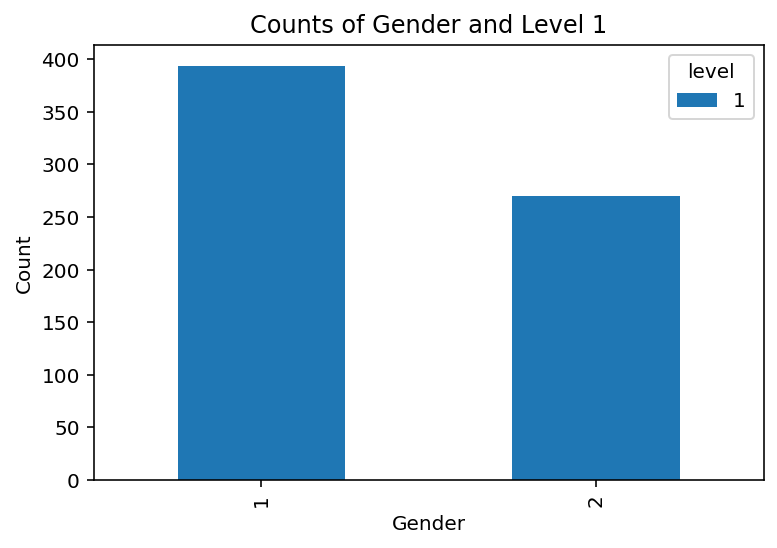

In [95]:
# Group the data by gender and level
grouped = A.groupby(['gender', 'level']).size().unstack()

# Select only the column for level 1
grouped = grouped[[1]]

# Create a stacked column chart
grouped.plot(kind='bar', stacked=True)

# Add axis labels and a title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Counts of Gender and Level 1')

# Display the chart
plt.show()


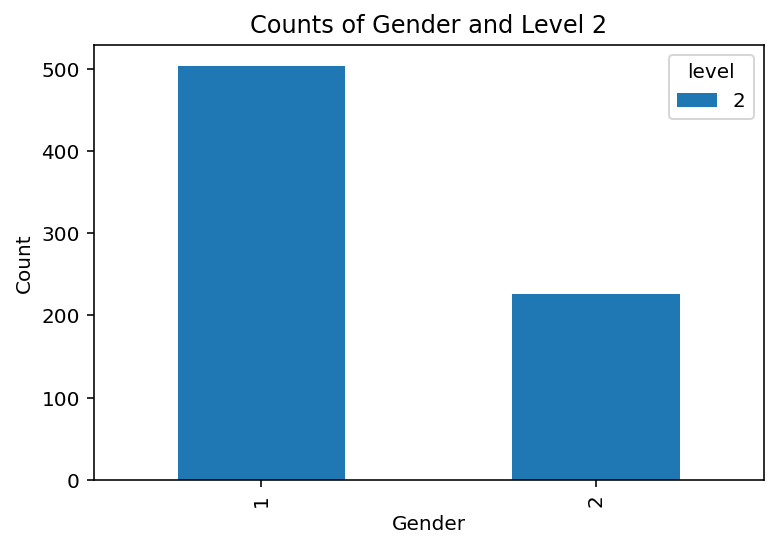

In [96]:
# Group the data by gender and level
grouped = A.groupby(['gender', 'level']).size().unstack()

# Select only the column for level 1
grouped = grouped[[2]]

# Create a stacked column chart
grouped.plot(kind='bar', stacked=True)

# Add axis labels and a title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Counts of Gender and Level 2')

# Display the chart
plt.show()

# **Visualization of age**

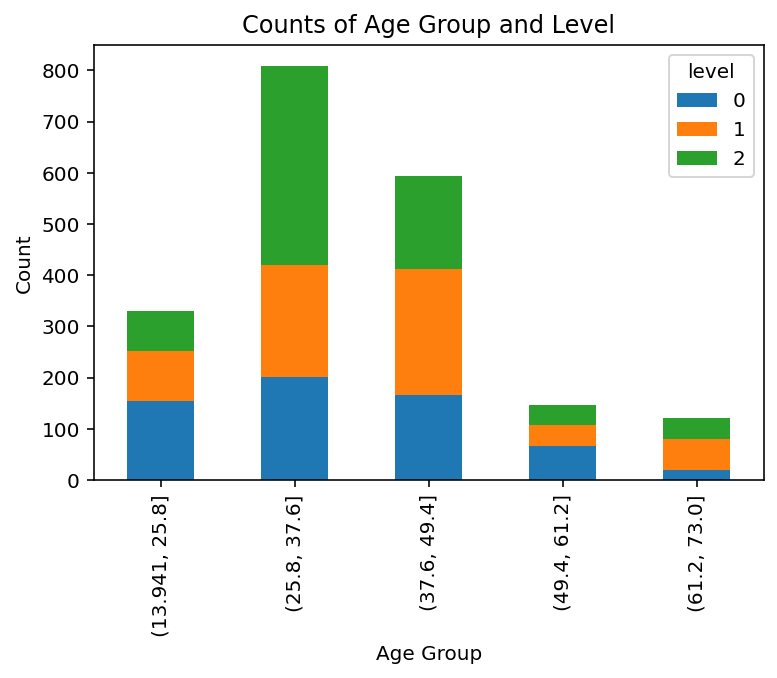

In [97]:
# Divide age into 5 groups
A['age_group'] = pd.cut(A['age'], bins=5)

# Group the data by age group and level
grouped = A.groupby(['age_group', 'level']).size().unstack()

# Select only the column for level 1
#grouped = grouped[[0]]

# Create a stacked column chart
grouped.plot(kind='bar', stacked=True)

# Add axis labels and a title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Counts of Age Group and Level')

# Display the chart
plt.show()

# **Setting Target**

In [98]:
# Setting Target

X = df.drop(columns='level')
X = X.drop(columns='age_group')
y = df.level

print('\n')
display(X.head(), y[:10])
print('\n')

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


index
0    0
1    1
2    2
3    2
4    2
5    2
6    0
7    0
8    1
9    1
Name: level, dtype: int64

# **Train Test Split**

In [99]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print('\nTrain Shape\n')
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('\n\nTest Shape\n')
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)
print('\n')


Train Shape

X train shape:  (1400, 23)
Y train shape:  (1400,)


Test Shape

X test shape:  (601, 23)
Y test shape:  (601,)




# **Scaling the Data**

In [100]:
# Data Scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# **Logistic Regression**

In [101]:
# Logistic Regression

logreg = LogisticRegression(C=24)

logreg.fit(X_train_scaled, y_train)

y_predict1 = logreg.predict(X_test_scaled)

**Confusion Matrix**

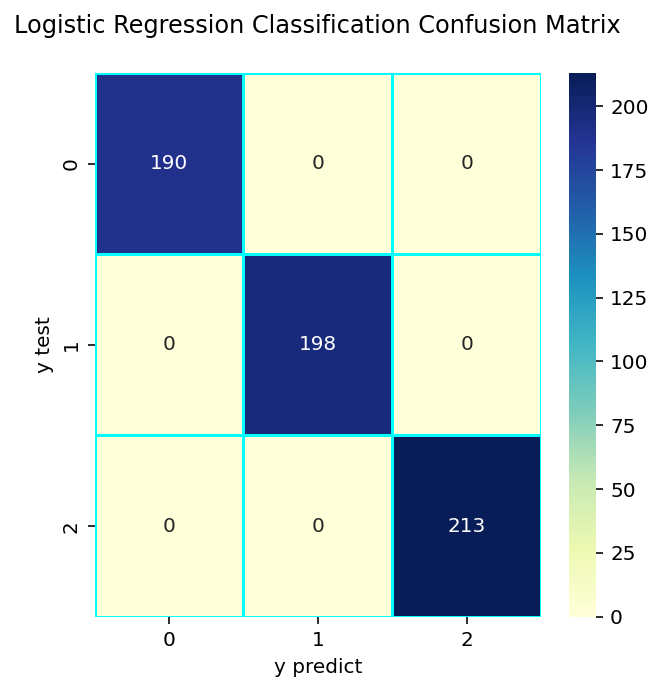

In [102]:
# Confusion Matrix

logreg_cm = confusion_matrix(y_test, y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

**Test Score**

In [103]:
# Test Score

print('\n')
score_logreg = logreg.score(X_test_scaled, y_test)
print('Logistic Regression Score = ',score_logreg)
print('\n')



Logistic Regression Score =  1.0




In [104]:
# Classification Report

print('\nClassification Report for Logistic Regression\n')
print(classification_report(y_test, y_predict1))
print('\n')


Classification Report for Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       198
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601





# **Gaussian Naive Bayes**

In [105]:
# Gaussian Naive Bayes

nbcla = GaussianNB()

nbcla.fit(X_train_scaled, y_train)

y_predict2 = nbcla.predict(X_test_scaled)

**Confusion Matrix**

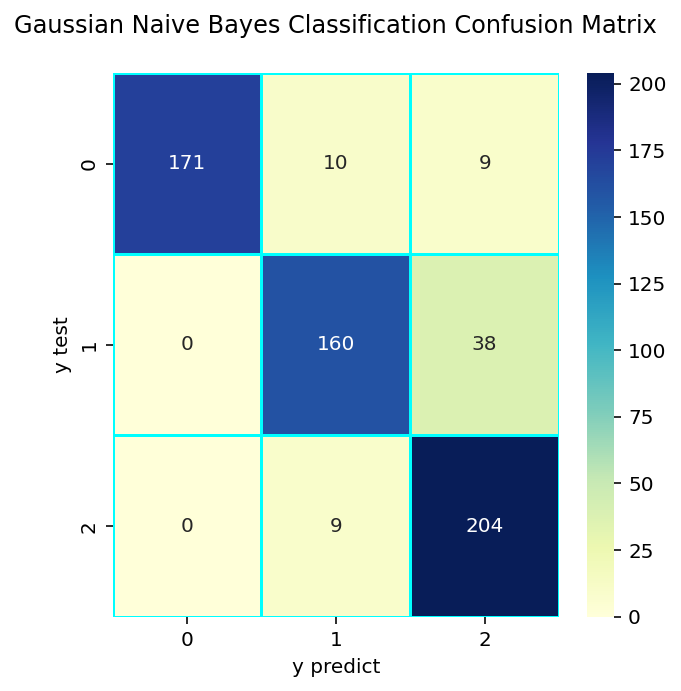

In [106]:
# Confusion Matrix

nbcla_cm = confusion_matrix(y_test, y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Gaussian Naive Bayes Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

**Test Score**

In [107]:
# Test Score

print('\n')
score_nbcla = nbcla.score(X_test_scaled, y_test)
print('Gaussian Naive Bayes Score = ',score_nbcla)
print('\n')



Gaussian Naive Bayes Score =  0.8901830282861897




In [108]:
# Classification Report

print('\nClassification Report for Gaussian Naive Bayes\n')
print(classification_report(y_test, y_predict2))
print('\n')


Classification Report for Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       190
           1       0.89      0.81      0.85       198
           2       0.81      0.96      0.88       213

    accuracy                           0.89       601
   macro avg       0.90      0.89      0.89       601
weighted avg       0.90      0.89      0.89       601





# **Decision Tree**

In [109]:
# Decision Tree

dtcla = DecisionTreeClassifier(random_state=9)

dtcla.fit(X_train_scaled, y_train)

y_predict3 = dtcla.predict(X_test_scaled)

**Confusion Matrix**

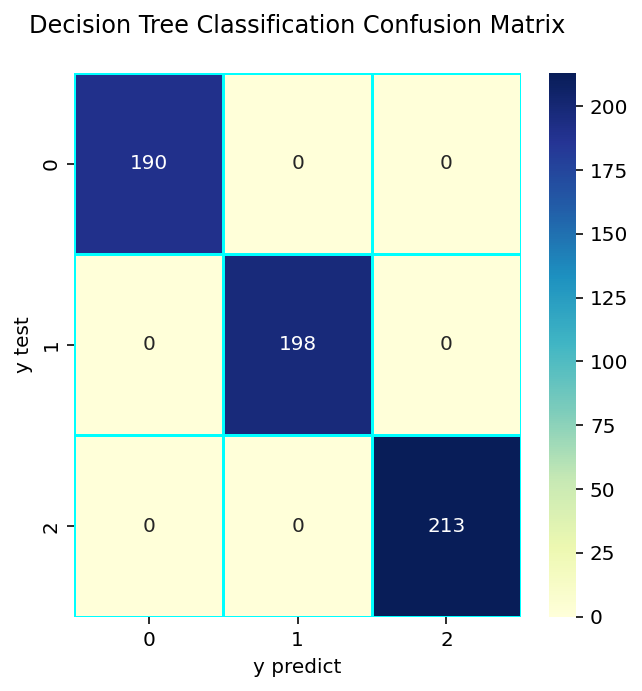

In [110]:
# Confusion Matrix

dtcla_cm = confusion_matrix(y_test, y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

**Test Score**

In [111]:
# Test Score
print('\n')
score_dtcla = dtcla.score(X_test_scaled, y_test)
print('Decision Tree Score = ', score_dtcla)
print('\n')



Decision Tree Score =  1.0




In [112]:
# Classification Report
print('\n\t\t\tClassification Tree for Decision Tree\n')
print(classification_report(y_test, y_predict3))
print('\n')


			Classification Tree for Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       198
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601





# **All Test Scores**

In [113]:
# All Test Scores

print('\n')
Testscores = pd.Series([score_logreg, score_nbcla, score_dtcla], 
                        index=['Logistic Regression Score = ', 'Naive Bayes Score = ', 'Decision Tree Score = ']) 
print(Testscores)
print('\n')



Logistic Regression Score =     1.000000
Naive Bayes Score =             0.890183
Decision Tree Score =           1.000000
dtype: float64




# **All Confusion Matrices**

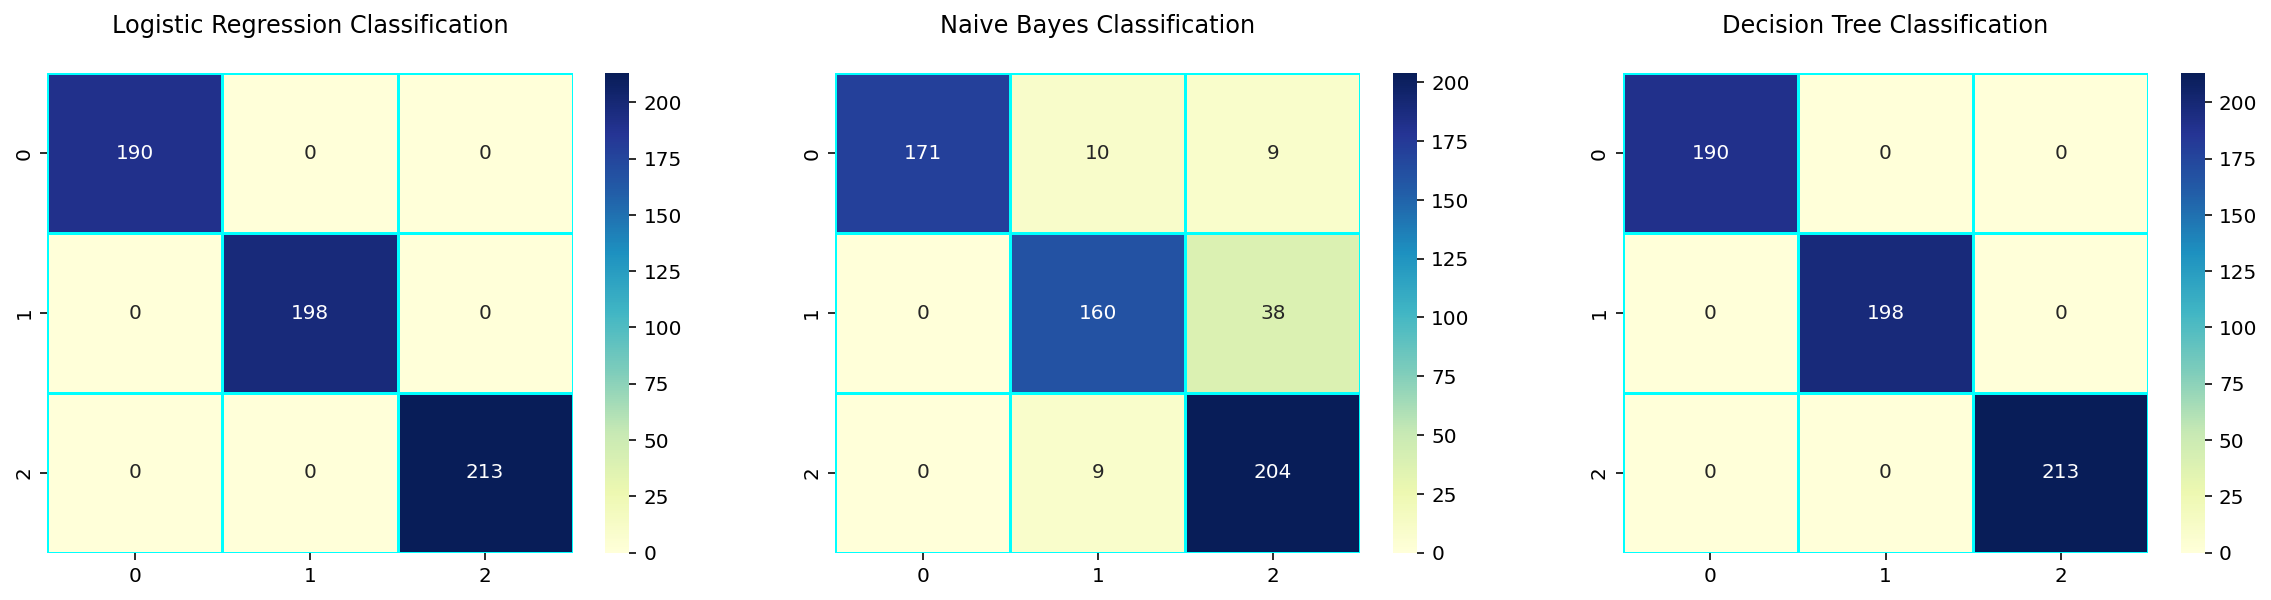

In [114]:
# All Confusion Matrices

print('\n')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification\n') 
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Naive Bayes Classification\n')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Decision Tree Classification\n')

sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)

plt.show()
print('\n')

# **Comparison**

In [115]:
# Comparison of Algorithms

x=['Logistic Regression', 'G. Naive Bayes', 'Decision Tree']
y = [score_logreg, score_nbcla, score_dtcla]

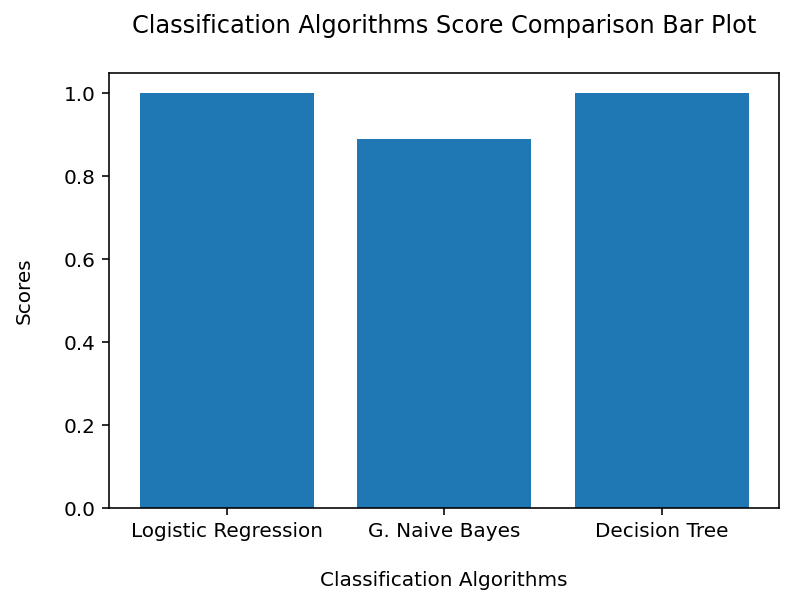

In [116]:
# Bar Plot

print('\n')
plt.bar(x,y)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Bar Plot\n')
plt.show()
print('\n')

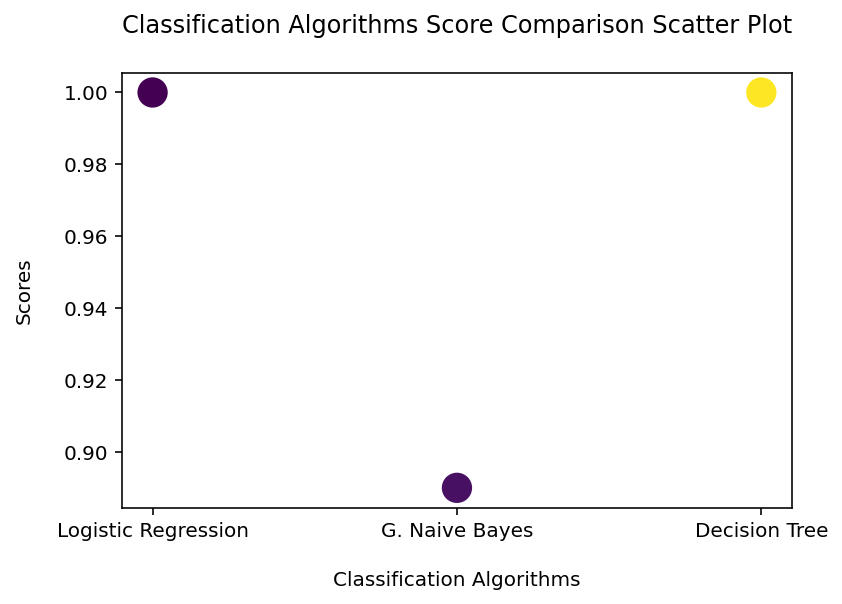

In [117]:
# Scatter Plot

print('\n')
colors = np.random.rand(3)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Scatter Plot\n')
plt.scatter(x, y, s=200, c=colors)
plt.show()
print('\n')

In [118]:
# Compare Scores and Find Out The Best Algorithm

al = False
ln = False
ld = False
nd = False

if score_logreg == score_nbcla and score_logreg == score_dtcla and score_nbcla == score_dtcla:
    al = True

if score_logreg == score_nbcla:
    ln = True
    
if score_logreg == score_dtcla:
    ld = True
    
if score_nbcla == score_dtcla:
    nd = True
      
if al:
    print('\nAll Models Perform The Same\n')
elif ln:
    print('\nLogistic Regression and Gaussian Naive Bayes Performs Better\n')
elif ld:
    print('\nLogistic Regression and Decision Tree Performs Better\n')
elif nd:
    print('\nGaussian Naive Bayes and Decision Tree Performs Better\n')
else:
    if score_logreg > score_nbcla and score_logreg > score_dtcla:
        print('\nLogistic Regression Performs Better\n')
    if score_nbcla > score_logreg and score_nbcla > score_dtcla:
        print('\nGaussian Naive Bayes Performs Better\n')
    if score_dtcla > score_logreg and score_dtcla > score_nbcla:
        print('\nDecision Tree Performs Better\n')


Logistic Regression and Decision Tree Performs Better

